In [ ]:
# Parameters
Currency = 'THAI BAHT'
Forecast_len = 15
Data_path = 'data/Foreign_Exchange_Rates.xls'
print(f'Currency: {Currency}')
print(f'Forecast_len: {Forecast_len}')
print(f'Data_path: {Data_path}')

In [ ]:
# !pip install autots
# from autots import AutoTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries imported')

Libraries imported


# **Loading data and displaying few rows**

In [ ]:
# data = pd.read_csv(Data_path, engine="python", on_bad_lines="skip", quotechar="'")
# data = pd.read_excel(Data_path, engine='xlrd')
# data = pd.read_csv(
#     Data_path,
#     engine="python",
#     on_bad_lines="skip",
#     quotechar="'",
#     doublequote=False,
#     escapechar="\\"
# )
rows = []
with open(Data_path, "r", errors="replace") as f:
    for line in f:
        # remove starting single quote '
        if line.startswith("'"):
            line = line[1:]
        # remove trailing , or ,\n
        line = line.strip().rstrip(",")
        # split on commas
        cols = line.split(",")
        rows.append(cols)

# Convert to DataFrame
data = pd.DataFrame(rows)

# OPTIONAL: set first row as header
data.columns = data.iloc[0]
data = data[1:].reset_index(drop=True)
data.head()

,,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


# **Check for null values**

In [ ]:

data.isnull().sum()

,0
0,
,0
Time Serie,0
AUSTRALIA - AUSTRALIAN DOLLAR/US$,0
EURO AREA - EURO/US$,0
NEW ZEALAND - NEW ZELAND DOLLAR/US$,0
UNITED KINGDOM - UNITED KINGDOM POUND/US$,0
BRAZIL - REAL/US$,0
CANADA - CANADIAN DOLLAR/US$,0
CHINA - YUAN/US$,0


# **Formatting timeseries and displaying few rows**

In [ ]:
data['Time Serie'] = pd.to_datetime(data['Time Serie'], format='%d-%m-%Y')
# data = data.set_index('Time Serie')

In [ ]:
data.head()

,,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


# **Checking data type**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0                                              5217 non-null   object        
 1   Time Serie                                 5217 non-null   datetime64[ns]
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object        
 3   EURO AREA - EURO/US$                       5217 non-null   object        
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object        
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object        
 6   BRAZIL - REAL/US$                          5217 non-null   object        
 7   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object        
 8   CHINA - YUAN/US$                           5217 non-null   object        
 9   HONG KONG - HONG KO

# **Removing unwanted string 'ND' from all columns and changing object currency rate columns to float**

In [ ]:
obj_cols = data.select_dtypes(include='object').columns
data = data[~data[obj_cols].eq('ND').any(axis=1)]
data[obj_cols] = data[obj_cols].astype(float)

# **Correlation heatmap for all relevant features**

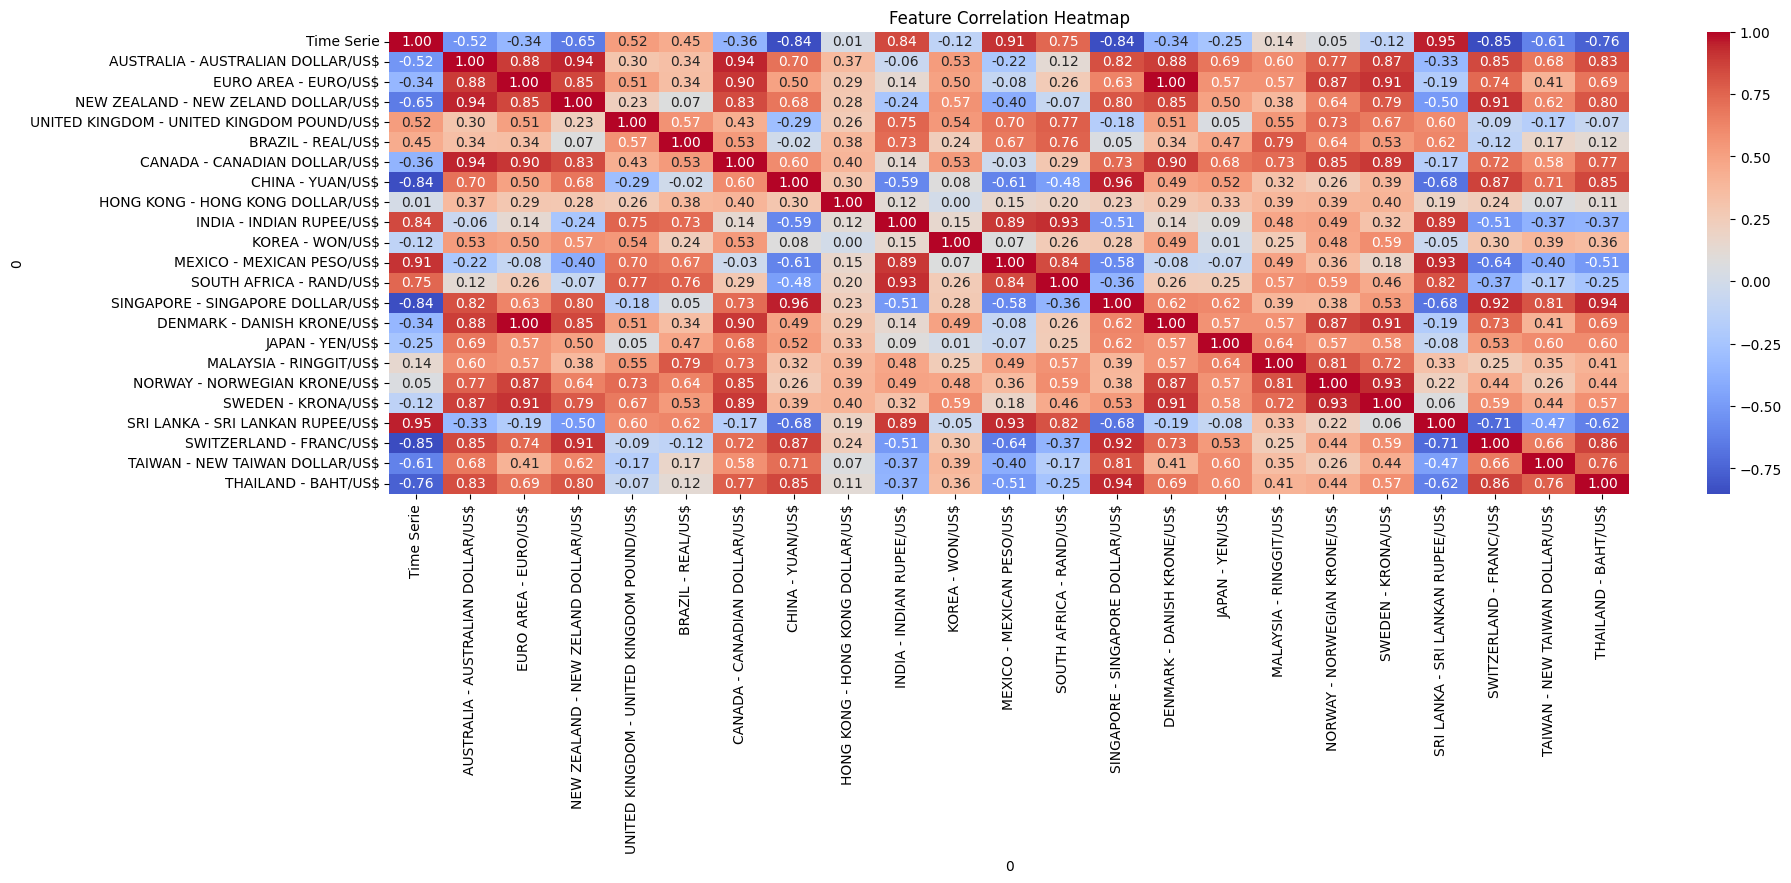

In [ ]:
# Correlation heatmap
plt.figure(figsize=(20, 6))

# Relevant columns
currency_df = data.iloc[:, 1:24]

# Create heatmap with only numeric columns
sns.heatmap(currency_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# currency_df = currency_df.set_index('Time Serie')

# **Currency rate change over time**

<Figure size 5000x1000 with 0 Axes>

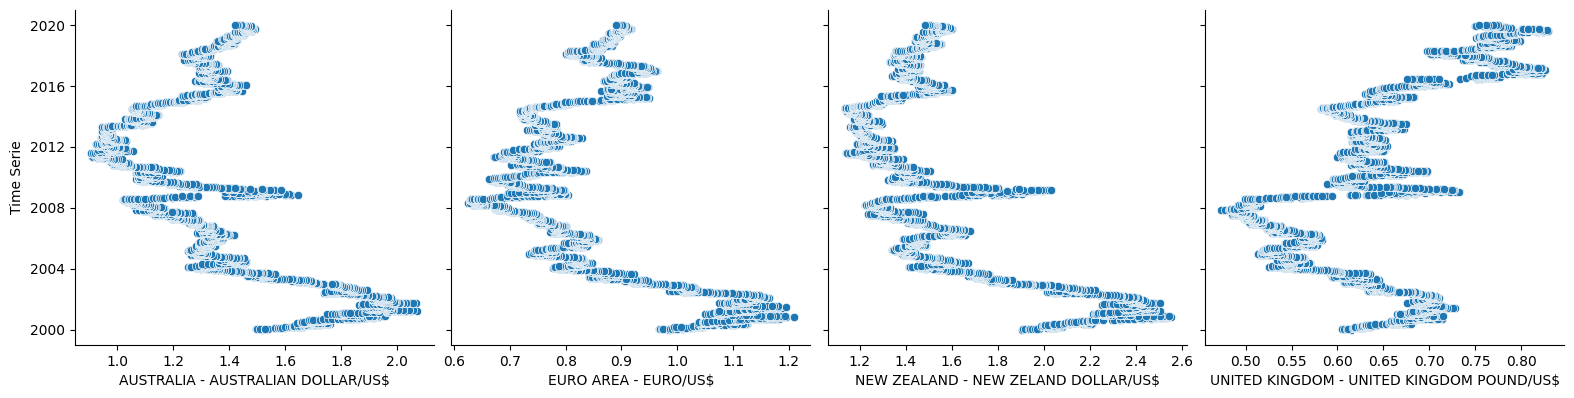

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(50, 10))
#plot all the scatterplots in a single plot
sns.pairplot(currency_df, x_vars=['AUSTRALIA - AUSTRALIAN DOLLAR/US$','EURO AREA - EURO/US$','NEW ZEALAND - NEW ZELAND DOLLAR/US$','UNITED KINGDOM - UNITED KINGDOM POUND/US$'], y_vars = 'Time Serie', height = 4, kind = 'scatter' )
plt.show()

<Figure size 5000x1000 with 0 Axes>

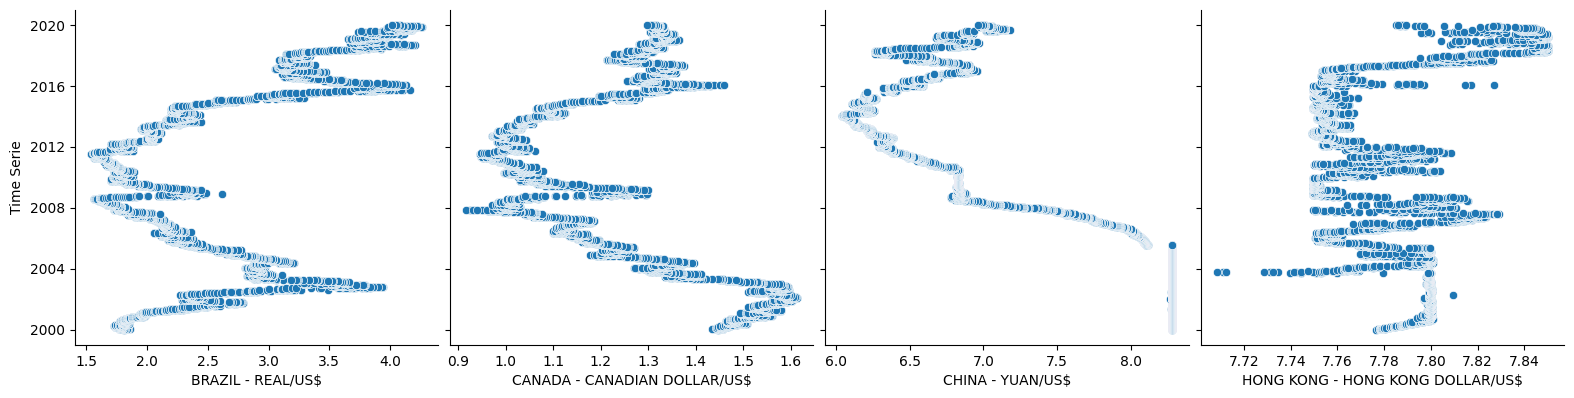

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(50, 10))
#plot all the scatterplots in a single plot
sns.pairplot(currency_df, x_vars=['BRAZIL - REAL/US$','CANADA - CANADIAN DOLLAR/US$','CHINA - YUAN/US$','HONG KONG - HONG KONG DOLLAR/US$'], y_vars = 'Time Serie', height = 4, kind = 'scatter' )
plt.show()

<Figure size 5000x1000 with 0 Axes>

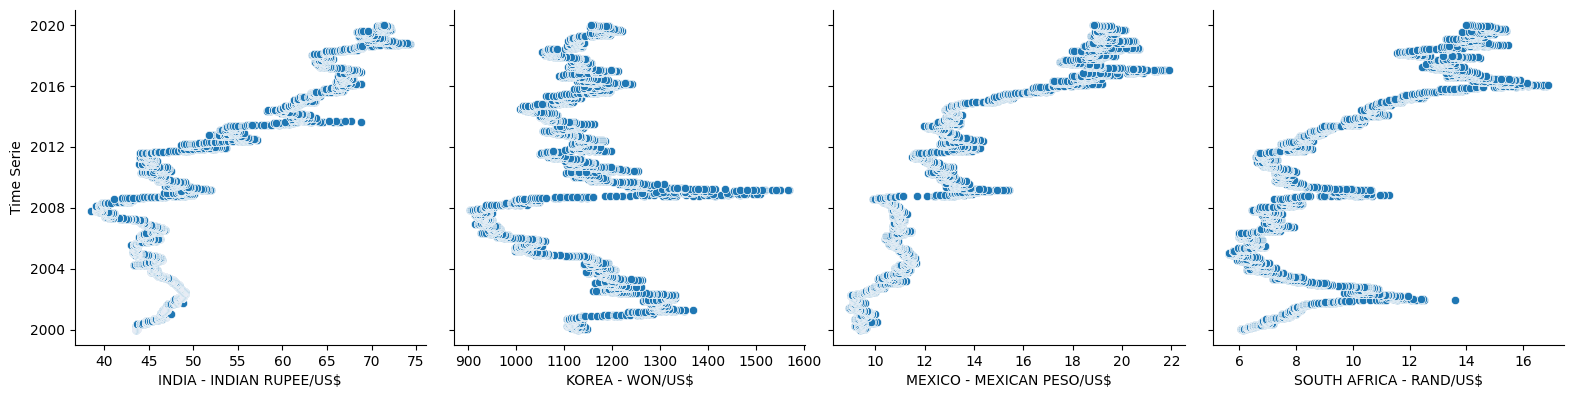

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(50, 10))
#plot all the scatterplots in a single plot
sns.pairplot(currency_df, x_vars=['INDIA - INDIAN RUPEE/US$','KOREA - WON/US$','MEXICO - MEXICAN PESO/US$','SOUTH AFRICA - RAND/US$'], y_vars = 'Time Serie', height = 4, kind = 'scatter' )
plt.show()

<Figure size 5000x1000 with 0 Axes>

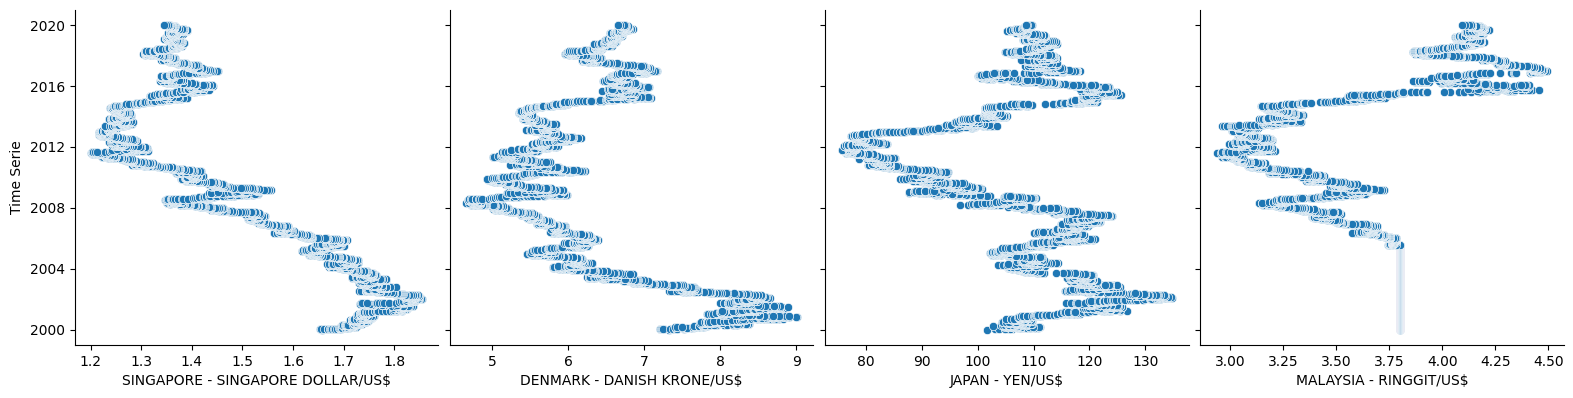

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(50, 10))
#plot all the scatterplots in a single plot
sns.pairplot(currency_df, x_vars=['SINGAPORE - SINGAPORE DOLLAR/US$','DENMARK - DANISH KRONE/US$','JAPAN - YEN/US$','MALAYSIA - RINGGIT/US$'], y_vars = 'Time Serie', height = 4, kind = 'scatter' )
plt.show()

<Figure size 5000x1000 with 0 Axes>

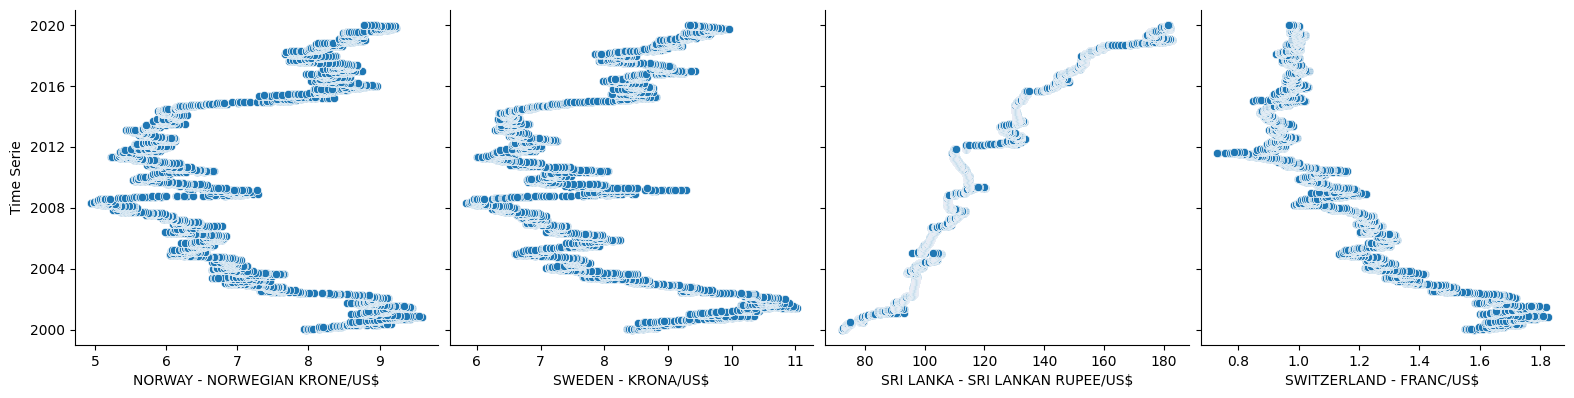

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(50, 10))
#plot all the scatterplots in a single plot
sns.pairplot(currency_df, x_vars=['NORWAY - NORWEGIAN KRONE/US$','SWEDEN - KRONA/US$','SRI LANKA - SRI LANKAN RUPEE/US$','SWITZERLAND - FRANC/US$'], y_vars = 'Time Serie', height = 4, kind = 'scatter' )
plt.show()

<Figure size 5000x1000 with 0 Axes>

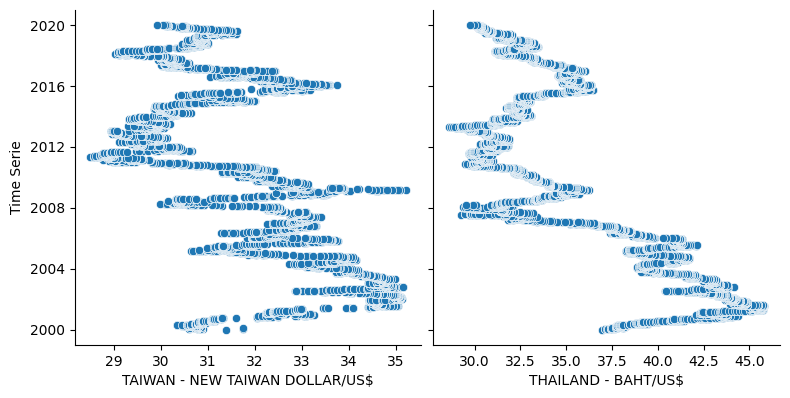

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(50, 10))
#plot all the scatterplots in a single plot
sns.pairplot(currency_df, x_vars=['TAIWAN - NEW TAIWAN DOLLAR/US$','THAILAND - BAHT/US$'], y_vars = 'Time Serie', height = 4, kind = 'scatter' )
plt.show()

# **Select one currency from the dictionary and use it to train model**

In [ ]:
currency = {
    'AUSTRALIAN DOLLAR': 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
    'EURO': 'EURO AREA - EURO/US$',
    'NEW ZEALAND DOLLAR': 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
    'GREAT BRITAIN POUNDS': 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
    'BRAZILIAN REAL': 'BRAZIL - REAL/US$',
    'CANADIAN DOLLAR': 'CANADA - CANADIAN DOLLAR/US$',
    'CHINESE YUAN$': 'CHINA - YUAN/US$',
    'HONG KONG DOLLAR': 'HONG KONG - HONG KONG DOLLAR/US$',
    'INDIAN RUPEE': 'INDIA - INDIAN RUPEE/US$',
    'KOREAN WON$': 'KOREA - WON/US$',
    'MEXICAN PESO': 'MEXICO - MEXICAN PESO/US$',
    'SOUTH AFRICAN RAND$': 'SOUTH AFRICA - RAND/US$',
    'SINGAPORE DOLLAR': 'SINGAPORE - SINGAPORE DOLLAR/US$',
    'DANISH KRONE': 'DENMARK - DANISH KRONE/US$',
    'JAPANESE YEN$': 'JAPAN - YEN/US$',
    'MALAYSIAN RINGGIT': 'MALAYSIA - RINGGIT/US$',
    'NORWEGIAN KRONE': 'NORWAY - NORWEGIAN KRONE/US$',
    'SWEDEN KRONA': 'SWEDEN - KRONA/US$',
    'SRILANKAN RUPEE': 'SRI LANKA - SRI LANKAN RUPEE/US$',
    'SWISS FRANC': 'SWITZERLAND - FRANC/US$',
    'NEW TAIWAN DOLLAR': 'TAIWAN - NEW TAIWAN DOLLAR/US$',
    'THAI BAHT': 'THAILAND - BAHT/US$'
}

currency[Currency]

'THAILAND - BAHT/US$'

# **Selecting date and a currency column and renaming it**

In [ ]:
df = currency_df[['Time Serie',currency[Currency]]].rename(columns = {'Time Serie':'Date',currency[Currency]:'Currency'})
df.head()

,Date,Currency
0,2000-01-03,36.97
1,2000-01-04,37.13
2,2000-01-05,37.10
3,2000-01-06,37.62
4,2000-01-07,37.30


# **Checking data distribution**

<Figure size 1400x500 with 0 Axes>

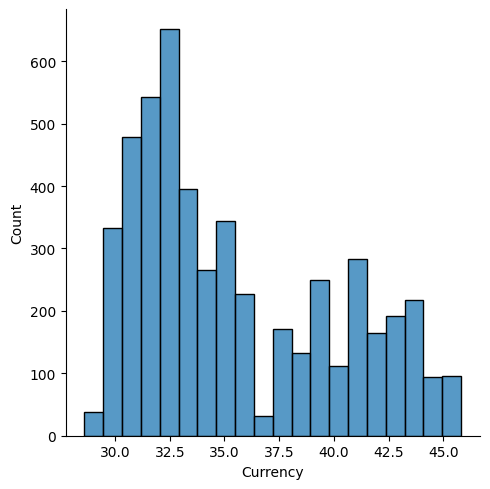

In [ ]:
plt.figure(figsize = (14,5))
sns.displot(df['Currency'])

In [ ]:
df['Diff'] = df['Currency'].pct_change()   # or df['price'].diff()
df = df.dropna()
df.head()

,Date,Currency,Diff
1,2000-01-04,37.13,0.004328
2,2000-01-05,37.10,-0.000808
3,2000-01-06,37.62,0.014016
4,2000-01-07,37.30,-0.008506
5,2000-01-10,37.27,-0.000804


# **Scaling currency column**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_currency = MinMaxScaler()
# scaler_diff = MinMaxScaler()
df['Currency_scaled'] = scaler_currency.fit_transform(df[['Currency']])
# df['Diff_scaled'] = scaler_diff.fit_transform(df[['Diff']])

df.head()

,Date,Currency,Diff,Currency_scaled
1,2000-01-04,37.13,0.004328,0.495354
2,2000-01-05,37.10,-0.000808,0.493612
3,2000-01-06,37.62,0.014016,0.523810
4,2000-01-07,37.30,-0.008506,0.505226
5,2000-01-10,37.27,-0.000804,0.503484


# **Preparing data sequence for LSTM**

In [ ]:
def Sequential_Input_LSTM(df, input_length):
    df_np = df.to_numpy()
    X = []
    y = []

    for i in range(len(df_np) - input_length):
        row = [a for a in df_np[i:i + input_length]]
        X.append(row)
        label = df_np[i +  input_length]
        y.append(label)

    return np.array(X), np.array(y)

In [ ]:
input_length = 10

X, y = Sequential_Input_LSTM(df[['Currency_scaled']], input_length)

In [ ]:
X.shape, y.shape

((5004, 10, 1), (5004, 1))

In [ ]:
X[1],y[1]

(array([[0.49361208],
        [0.52380952],
        [0.50522648],
        [0.50348432],
        [0.5232288 ],
        [0.51916376],
        [0.51626016],
        [0.51974448],
        [0.51103368],
        [0.51103368]]),
 array([0.50406504]))

# **Train-Test split**

In [ ]:
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.2)

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

In [ ]:
X_train.shape, y_train.shape

((3502, 10, 1), (3502, 1))

In [ ]:
X_val.shape, y_val.shape

((1000, 10, 1), (1000, 1))

In [ ]:
X_test.shape, y_test.shape

((502, 10, 1), (502, 1))

# **Checking number of total, training, validation and test days**

In [ ]:
print(f'Total days      : {round(len(df)/24)}')
print(f'Training days   : {round(len(X_train)/24)}')
print(f'Validation days : {round(len(X_val)/24)}')
print(f'Testing days    : {round(len(X_test)/24)}')

Total days      : 209
Training days   : 146
Validation days : 42
Testing days    : 21


In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam

# **Defining model architecture with 1 feature**

In [ ]:
no_of_feature = 1

LSTM_model = Sequential()

LSTM_model.add(InputLayer((input_length,no_of_feature)))
LSTM_model.add(LSTM(100, return_sequences = True))
LSTM_model.add(LSTM(100, return_sequences = True))
LSTM_model.add(LSTM(50))
LSTM_model.add(Dense(8, activation = 'relu'))
LSTM_model.add(Dense(1, activation = 'linear'))

LSTM_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 10, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 10, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,817 (593.04 KB)

 Trainable params: 151,817 (593.04 KB)

 Non-trainable params: 0 (0.00 B)

# **Defining early stopping , monitoring metrics , epochs and optimizer**

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

LSTM_model.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

# **Training model and analyzing metrics**

In [ ]:
LSTM_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, callbacks = [early_stop])

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.2032 - root_mean_squared_error: 0.4445 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0576
Epoch 2/10
 83/110 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0033 - root_mean_squared_error: 0.0571

In [ ]:
LSTM_loss = pd.DataFrame(LSTM_model.history.history)
LSTM_loss

# **Save the trained model for reuse**

In [ ]:
LSTM_model.save(f'models/{Currency}_lstm_model.keras')

# **Plotting train loss vs validation loss**

In [ ]:
LSTM_loss.plot(figsize = (10,6))

# **Predicting with X_test data using trained model and comparing against actual y_test**

In [ ]:
LSTM_predictions = LSTM_model.predict(X_test).flatten()
LSTM_predictions_org = (scaler_currency.inverse_transform(LSTM_predictions.reshape(-1, 1)).flatten())

y_test_org = (scaler_currency.inverse_transform(y_test.reshape(-1,1)).flatten())

X_test_org = (scaler_currency.inverse_transform(X_test.reshape(-1, 1))).flatten()

LSTM_predictions_org.shape, y_test_org.shape

In [ ]:
LSTM_predictions_df = pd.DataFrame({'y_test':list(y_test_org), 'LSTM Prediction':list(LSTM_predictions_org)})
LSTM_predictions_df.head()

# **Defining index for test data and using it to plot first 500 data points of True value vs Predicted value**

In [ ]:
test_index = df.index[input_length + train_size + val_size :
                      input_length + train_size + val_size + len(LSTM_predictions_org)]

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(test_index[:500], y_test_org[:500], label='True values')
plt.plot(test_index[:500], LSTM_predictions_org[:500], label='Predicted values')
plt.legend()
plt.xlabel("Test data")
plt.ylabel(f"Currency {Currency}")
plt.title("First 500 Predictions vs True Values")
plt.show()

# **Using last sequence of test data predicitng future values**

In [ ]:
last_sequence = X_test[-1]
current_seq = last_sequence.copy()
LSTM_future_predictions = []
num_days = Forecast_len

for _ in range(num_days):
    pred = LSTM_model.predict(current_seq.reshape(1, 10, 1))[0][0]
    LSTM_future_predictions.append(pred)
    current_seq = np.append(current_seq[1:], pred).reshape(10, 1)

LSTM_future_predictions_real = scaler_currency.inverse_transform(np.array(LSTM_future_predictions).reshape(-1,1)).flatten()

LSTM_future_predictions, LSTM_future_predictions_real

# **Sorting df['Date'] to get last date to assign it against forcasted currency**

In [ ]:
df = df.sort_values('Date')
last_date = df['Date'].iloc[-1]

future_dates = pd.date_range(start=last_date, periods=Forecast_len + 1, freq='D')[1:]
LSTM_forecast_df = pd.DataFrame({
    "Date": future_dates,
    "Forecasted_Currency": LSTM_future_predictions_real
})
print(LSTM_forecast_df)

# **Plotting LSTM Forecast**

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(LSTM_forecast_df["Date"], LSTM_forecast_df["Forecasted_Currency"], marker="o")

plt.title(f"{Forecast_len}-Day LSTM Forecast")
plt.xlabel("Date")
plt.ylabel("Currency")
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

# **Plotting Real vs Forecasted Currency**

In [ ]:
last_real = df.tail(Forecast_len)[["Date", "Currency"]]
last_real = last_real.rename(columns={"Currency": "Value"})
forecast_plot = LSTM_forecast_df.rename(columns={"Forecasted_Currency": "Value"})

combined = pd.concat([last_real, forecast_plot], ignore_index=True)

plt.figure(figsize=(12,6))
plt.plot(combined["Date"], combined["Value"], marker="o")

plt.title(f"Real vs Forecasted Currency (Last {Forecast_len} Real + {Forecast_len} Future Days)")
plt.xlabel("Date")
plt.ylabel("Currency")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()